# QuantumSim - Introduction
Author: Nico Kuijpers<br>
Date: May 12, 2024

In this Jupyter notebook we introduce QuantumSim, a simple quantum computer simulator.

## Required imports
For this notebook, the following Python packages are required:
* NumPy, a package for scientific computing in Python. See https://numpy.org/
* Matplotlib, a library for visualizations in Python. See https://matplotlib.org/
* Random, a module that implements pseudo-random number generators for various distributions. See https://docs.python.org/3/library/random.html
* Counter, a container in which elements are stored as dictionary keys, and their counts are stored as dictionary values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

## Dirac notation
We will make use of the Dirac notation to describe (quantum) states and (quantum) operators. The following notation will be used:
* $|a\rangle$ is called *ket* and represents a column vector with $1$ in entry $a$ and $0$ everywhere else.
* $\langle a|$ is called *bra* and represents a row vector with $1$ in entry $a$ and $0$ everywhere else.
* $\langle a||b\rangle$ or $\langle a | b \rangle$ is the *inner product* of $\langle a|$ and $|b\rangle$, which is $1$ if $a=b$ and $0$ if $a\neq b$.
* $|a\rangle \langle b|$ is the *outer product* of $|a\rangle$ and $\langle b|$, which is a matrix with $1$ in entry $(a,b)$ and $0$ everywhere else.

Below, these functions are defined in Python for row and column vectors of length $N$.

In [2]:
"""
Functions for the Dirac notation to describe (quantum) states and (quantum) operators.
|a> is called 'ket' and represents a column vector with 1 in entry a and 0 everywhere else.
<a| is called 'bra' and represents a row vector with 1 in entry a and 0 everywhere else.
<a||b> is the inner product of <a| and |b>, which is 1 if a = b and 0 if a != b.
|a><b| is the outer product of |a> and <b|, which is a matrix with 1 in entry (a,b) and 0 everywhere else.
"""
class Dirac:
    
    @staticmethod
    def ket(N, a):
        ket = np.zeros((N, 1))
        ket[a, 0] = 1
        return ket

    @staticmethod
    def bra(N, a):
        bra = np.zeros((1, N))
        bra[0, a] = 1
        return bra

    @staticmethod
    def bra_ket(N, a, b):
        bra = Dirac.bra(N, a)
        ket = Dirac.ket(N, b)
        return np.inner(bra, ket.T)

    @staticmethod
    def ket_bra(N, a, b):
        ket = Dirac.ket(N, a)
        bra = Dirac.bra(N, b)
        return np.outer(ket, bra)

### Example
Below are some examples of how functions *ket()*, *bra()*, *bra_ket()*, and *ket_bra()* can be used in Python.

In [3]:
N = 3
a = 2
b = 2
print(f"|a> = \n{Dirac.ket(N, a)}\n")
print(f"<b| = {Dirac.bra(N, b)}\n")
print(f"<a|b> = {Dirac.bra_ket(N, a, b)}\n")
print(f"|a><b| = \n{Dirac.ket_bra(N, a, b)}\n")


|a> = 
[[0.]
 [0.]
 [1.]]

<b| = [[0. 0. 1.]]

<a|b> = [[1.]]

|a><b| = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]



## Qubit unitary operations
In QuantumSim, the following qubit unitary operations are supported:

Pauli operations $\mathbf{I}$, $X = \sigma_x$, $Y = \sigma_y$, and $Z = \sigma_z$ are quantum operations represented by the Pauli matrices:

$\mathbf{I} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$

$\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$

$\sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$

$\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$

The Hadamard operation $H$ is represented by

$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$

Phase operations $P_\theta$ are described by

$P_\theta = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix}$

These unitary operations are defined below in Python as static methods of class QubitUnitaryOperation.

In [4]:
"""
Functions to obtain 2 x 2 unitary matrices for unitary qubit operations.
"""
class QubitUnitaryOperation:
    
    @staticmethod
    def get_identity():
        return np.array([[1,0],[0,1]],dtype=complex)
    
    @staticmethod
    def get_pauli_x():
        return np.array([[0,1],[1,0]],dtype=complex)
    
    @staticmethod
    def get_pauli_y():
        return np.array([[0,complex(0,-1)],[complex(0,1),0]])
    
    @staticmethod
    def get_pauli_z():
        return np.array([[1,0],[0,-1]],dtype=complex)
    
    @staticmethod
    def get_hadamard():
        c = complex(1/np.sqrt(2),0)
        return np.array([[c,c],[c,-c]])
    
    @staticmethod
    def get_phase(theta):
        c = complex(np.cos(theta),np.sin(theta))
        return np.array([[1,0],[0,c]])

### Example
Below are some examples of how qubit unitary operations can be created in Python.

In [5]:
print(f"Pauli Y =\n{QubitUnitaryOperation.get_pauli_y()}\n")
print(f"Hadamard =\n{QubitUnitaryOperation.get_hadamard()}\n")
theta = np.pi/4
print(f"Phase({theta}) =\n{QubitUnitaryOperation.get_phase(theta)}\n")

Pauli Y =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

Hadamard =
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678-0.j]]

Phase(0.7853981633974483) =
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]



## Quantum states
A single qubit can be in a superpostion of two basis states, here denoted by $|0\rangle$ and $|1\rangle$. 
The quantum state of a single qubit in super position can be represented as

$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$,

where $\alpha$ is a complex number representing the probability that the qubit would be in state $|0\rangle$ and 
$\beta$ is a complex number representing the probability that the qubit would be in state $|1\rangle$.
To ensure that the total probalibility is equal to $1$, the coefficients $\alpha$ and $\beta$ should satisfy the
normalization condition, i.e.,

$|\alpha|^2 + |\beta|^2 = 1$.

Here, $|\alpha|$ and $|\beta|$ represent the magnitude (or absolute value) of probability amplitudes $\alpha$ and $\beta$, respectively.
The square of the magnitude represents the probability of measuring the qubit to be in the corresponding basis state.

The basis states of a quantum circuit of $N$ qubits is represented by a column vector of length $N$ with entries $0$ and $1$.
The first entry represents the state of the first qubit, $q_0$, the second entry the state of the second qubit, $q_1$, etc.
Since each entry can be either $0$ or $1$, there are $2^N$ possible basis states. 
The quantum state of a quantum circuit of $N$ qubits is therefore represented by a column vector of complex numbers of length $2^N$, where
the $i$-th entry in the state vector represents the probability amplitude associated with the $i$-th basis state of the system. 

In general, the quantum state of a circuit of $N$ qubits can be represented as

$|\psi\rangle = \sum_{i=0}^{2^N-1} \alpha_i |i\rangle$,

where $|i\rangle$ represents the $i$-th basis state and $\alpha_i$ the probability amplitude corresponding to that basis state.

As before, the coefficients $\alpha_i$ are complex numbers and satisfy the normalization condition, i.e.,

$\sum_{i=0}^{2^N-1} |\alpha_i|^2 = 1$. 

A quantum circuit of $2$ qubits has the following $4$ basis states for $0 \leq i < 4$:
* $i=0$: $|00\rangle$
* $i=1$: $|01\rangle$
* $i=2$: $|10\rangle$
* $i=3$: $|11\rangle$

Below, a function is defined to convert basis state $i$, $0 \leq i < 2^N$, for a circuit of $N$ qubits to this notation.

In [6]:
"""
Function to convert integer i, 0 <= i < N, to a quantum state in Dirac notation.
"""
def state_as_string(i,N):
    # Check if 0 <= i < 2^N
    if i < 0 or i >= 2**N:
        raise ValueError("Input i and N must satisfy 0 <= i < 2^N")
    
    binary_string = bin(i)
    state_as_string = binary_string[2:]
    state_as_string = state_as_string.zfill(N)
    return "|" + state_as_string + ">"


### Example
In this example we show all basis states of a circuit of $3$ qubits. 

In [7]:
N = 3
for i in range(2**N):
    print(state_as_string(i,N))


|000>
|001>
|010>
|011>
|100>
|101>
|110>
|111>


## Unitary operations
A unitary operation on a quantum circuit of $N$ qubits is represented by a $N \times N$ unitary matrix of complex numbers.
A square matrix of complex numbers $U$ is unitary if the following equalities are satisfied:

$U^\dagger U = \mathbf{I} = U U^\dagger$,

where matrix $U^\dagger$ represents the conjugate transpose of matrix $U$ and $\mathbf{I}$ is the identity matrix of the same size.

Below, we define a Python class StateVector representing the quantum state of a quantum circuit of $N$ qubits. 

Upon initialization, a quantum state vector of length $2^N$ will be created with first entry $1$ and all other entries $0$.
Thus, the initial state represents quantum state $|0^N\rangle$, where $0^N$ denotes $N$ consecutive zeros.

With a method call of *apply_unitary_operation()* a unitary operation can be applied to the quantum state for unitary matrix 
$U$ of size $2^N \times 2^N$. This operation will only be performed when $U$ satisfies $U^\dagger U = \mathbf{I}$, 
otherwise an error message will be printed.

Upon method call *measure()*, the quantum state vector collapses to a classical state. 
When the state vector is measured, one of the $2^N$ possible basis states will chosen at random with probabilities $|\alpha_i|^2$, where
$\alpha_i$ indicates the probability amplitude of basis state $i$. The chosen basis state is stored in instance variable *index*.

Upon method call *print()*, the state vector will be printed to screen.

In [8]:
"""
Class representing a quantum circuit of N qubits.
"""
class StateVector:
    
    def __init__(self, N):
        self.N = N
        self.index = 0
        self.state_vector = np.zeros((2**self.N, 1), dtype=complex)
        self.state_vector[self.index] = 1

    def apply_unitary_operation(self, operation):
        # Check if operation is a unitary matrix
        if not np.allclose(np.eye(2**self.N), np.dot(np.conj(operation.T), operation)):
            raise ValueError("Input matrix is not unitary")
        self.state_vector = np.dot(operation, self.state_vector)

    def measure(self):
        probalities = np.square(np.abs(self.state_vector)).flatten()
        self.index = np.random.choice(len(probalities), p=probalities)

    def get_quantum_state(self):
        return self.state_vector
    
    def get_classical_state_as_string(self):
        return state_as_string(self.index, self.N)
    
    def print(self):
        for i, val in enumerate(self.state_vector):
            print(f"{state_as_string(i,self.N)} : {val[0]}")

### Example
In this example, a quantum state vector is created for a single qubit and the Pauli X operation is applied.

In [9]:
state_vector = StateVector(1)
print("Initial state")
state_vector.print()
state_vector.apply_unitary_operation(QubitUnitaryOperation.get_pauli_x())
print("State after applying Pauli X operation")
state_vector.print()

Initial state
|0> : (1+0j)
|1> : 0j
State after applying Pauli X operation
|0> : 0j
|1> : (1+0j)


### Circuit unitary operations
Suppose we want to apply a qubit unitary operation on one of the qubits of a circuit of $N$ qubits and leave the other qubits alone.
To do this, we first compute the corresponding $2^N \times 2^N$ unitary matrix $U$ and then multiply $U$ with the state vector of length $2^N$.

For example, suppose we have a circuit of $2$ qubits and we want to apply the Pauli X operator on the second qubit, leaving the first
qubit alone.
The $4 \times 4$ unitary matrix $U$ representing the combined operation is the tensor product of the $2 \times 2$ $\mathbf{I}$ 
with the $2 \times $ matrix $X$, i.e.,

$U = \mathbf{I} \otimes X$.

If we would have $4$ qubits and want to apply the Pauli X operation on the third qubit, then the unitary matrix $U$ would be of size
$16 \times 16$ and be defined by

$U = \mathbf{I} \otimes \mathbf{I} \otimes X \otimes \mathbf{I}$.

Quantum computing becomes interesting when an operation is applied to two or more qubits simultaneously. For example, 
in the case of a circuit of $2$ qubits, the controlled-NOT (or CNOT) operator is defined by

$\text{CNOT} = |0\rangle \langle 0| \otimes \mathbf{I} + |1\rangle \langle 1| \otimes X = 
\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$

Suppose we would have a circuit of $4$ qubits and we want to apply the CNOT operation with the second qubit as control and the fourth
as target. Then the unitary matrix $U$ would be of size $16 \times 16$ and be defined by

$U = 
\mathbf{I} \otimes |0\rangle \langle 0| \otimes \mathbf{I} \otimes \mathbf{I} +
\mathbf{I} \otimes |1\rangle \langle 1| \otimes \mathbf{I} \otimes \mathbf{X}$.

Below the class *CircuitUnitaryOperation* is defined which can be used to compute the $2^N \times 2^N$ unitary matrices 
for Pauli, Hadamard, Phase, and CNOT operations on any combinations of qubits of a circuit of $N$ qubits.

In [10]:
"""
Functions to obtain N x N unitary matrices for unitary operations on quantum circuits of N qubits.
"""
class CircuitUnitaryOperation:
    
    @staticmethod
    def get_combined_operation_for_qubit(operation, q, N):
        identity = QubitUnitaryOperation.get_identity()
        combined_operation = np.eye(1,1)
        for i in range(0, N):
            if i == q:
                combined_operation = np.kron(combined_operation, operation)
            else:
                combined_operation = np.kron(combined_operation, identity)
        return combined_operation

    @staticmethod
    def get_combined_operation_for_identity(q, N):
        return np.array(np.eye(2**N),dtype=complex)
    
    @staticmethod
    def get_combined_operation_for_pauli_x(q, N):
        pauli_x = QubitUnitaryOperation.get_pauli_x()
        return CircuitUnitaryOperation.get_combined_operation_for_qubit(pauli_x, q, N)
    
    @staticmethod
    def get_combined_operation_for_pauli_y(q, N):
        pauli_y = QubitUnitaryOperation.get_pauli_y()
        return CircuitUnitaryOperation.get_combined_operation_for_qubit(pauli_y, q, N)
    
    @staticmethod
    def get_combined_operation_for_pauli_z(q, N):
        pauli_z = QubitUnitaryOperation.get_pauli_z()
        return CircuitUnitaryOperation.get_combined_operation_for_qubit(pauli_z, q, N)
    
    @staticmethod
    def get_combined_operation_for_hadamard(q, N):
        hadamard = QubitUnitaryOperation.get_hadamard()
        return CircuitUnitaryOperation.get_combined_operation_for_qubit(hadamard, q, N)
    
    @staticmethod
    def get_combined_operation_for_phase(theta, q, N):
        phase = QubitUnitaryOperation.get_phase(theta)
        return CircuitUnitaryOperation.get_combined_operation_for_qubit(phase, q, N)
    
    @staticmethod
    def get_combined_operation_for_cnot(control, target, N):
        identity = QubitUnitaryOperation.get_identity()
        pauli_x = QubitUnitaryOperation.get_pauli_x()
        ket_bra_00 = Dirac.ket_bra(2,0,0)
        ket_bra_11 = Dirac.ket_bra(2,1,1)
        combined_operation_zero = np.eye(1,1)
        combined_operation_one = np.eye(1,1)
        for i in range (0, N):
            if control == i:
                combined_operation_zero = np.kron(combined_operation_zero, ket_bra_00)
                combined_operation_one  = np.kron(combined_operation_one, ket_bra_11)
            elif target == i:
                combined_operation_zero = np.kron(combined_operation_zero, identity)
                combined_operation_one  = np.kron(combined_operation_one, pauli_x)
            else:
                combined_operation_zero = np.kron(combined_operation_zero, identity)
                combined_operation_one  = np.kron(combined_operation_one, identity)
            
        return combined_operation_zero + combined_operation_one

### Example
In this example, the combined operation for the CNOT operator on a circuit of $2$ qubits is created. 
The first qubit is the control and the second is the target.

In [11]:
combined_operation = CircuitUnitaryOperation.get_combined_operation_for_cnot(0,1,2)
print(combined_operation)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


### Example
In this example, the combined operation for the CNOT operator on a circuit of $2$ qubits is created. 
The second qubit is the control and the first is the target.

In [12]:
combined_operation = CircuitUnitaryOperation.get_combined_operation_for_cnot(1,0,2)
print(combined_operation)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


## Quantum Circuit
A quantum circuit consists of $N$ qubits. 
It's quantum state is represented by a StateVector of length $2^N$ on which unitary operations can be applied. 

Below we define the class Circuit. In addition to the state vector it also has a list of operations and a list of
descriptions describing each of the operations.
Upon calling one of the methods *identity()*, *pauli_x()*, *pauli_y()*, *pauli_z()*, *hadamard()*, *phase()* or *cnot()*,
the corresponding combined operation is computed and appended to the list of operations. 
Also an appropriate description is appended to the list of descriptions.

Upon calling the method *execute()* all operations in the list are applied to the state vector, one after each other.
By setting the *print_state* flag to True, the combined operations as well as all intermediate states as will be printed.

Upon calling the method *measure()*, the quantum state collapses and a classical state will be determined. 
By settting the *print_state* flag to True, the measured (classical) state will be printed. The classical state
can also be obtained by calling the method *get_classical_state_as_string()*.

In [13]:
"""
Class representing a quantum circuit of N qubits.
"""
class Circuit:
    
    def __init__(self,N):
        self.N = N
        self.state_vector = StateVector(self.N)
        self.quantum_states = [self.state_vector.get_quantum_state()]
        self.descriptions = []
        self.operations = []

    def identity(self, q):
        combined_operation = CircuitUnitaryOperation.get_combined_operation_for_identity(q, self.N)
        self.descriptions.append(f"Identity on qubit {q}")
        self.operations.append(combined_operation)

    def pauli_x(self, q):
        combined_operation = CircuitUnitaryOperation.get_combined_operation_for_pauli_x(q, self.N)
        self.descriptions.append(f"Pauli X on qubit {q}")
        self.operations.append(combined_operation)

    def pauli_y(self, q):
        combined_operation = CircuitUnitaryOperation.get_combined_operation_for_pauli_y(q, self.N)
        self.descriptions.append(f"Pauli Y on qubit {q}")
        self.operations.append(combined_operation)

    def pauli_z(self, q):
        combined_operation = CircuitUnitaryOperation.get_combined_operation_for_pauli_z(q, self.N)
        self.descriptions.append(f"Pauli Z on qubit {q}")
        self.operations.append(combined_operation)

    def hadamard(self, q):
        combined_operation = CircuitUnitaryOperation.get_combined_operation_for_hadamard(q, self.N)
        self.descriptions.append(f"Hadamard on qubit {q}")
        self.operations.append(combined_operation)

    def phase(self, theta, q):
        combined_operation = CircuitUnitaryOperation.get_combined_operation_for_phase(theta, q, self.N)
        self.descriptions.append(f"Phase with theta = {theta} on qubit {q}")
        self.operations.append(combined_operation)

    def cnot(self, control, target):
        combined_operation = CircuitUnitaryOperation.get_combined_operation_for_cnot(control, target, self.N)
        self.descriptions.append(f"CNOT with control qubit {control} and target qubit {target}")
        self.operations.append(combined_operation)

    def execute(self, print_state=False):
        self.state_vector = StateVector(self.N)
        if print_state:
            print("Initial quantum state")
            self.state_vector.print()
        for operation, description in zip(self.operations, self.descriptions):
            self.state_vector.apply_unitary_operation(operation)
            self.quantum_states.append(self.state_vector.get_quantum_state())
            if print_state:
                print(description)
                print(operation)
                print("Current quantum state")
                self.state_vector.print()

    def measure(self, print_state=False):
        self.state_vector.measure()
        if print_state:
            print("Measured state:")
            print(self.state_vector.get_classical_state_as_string())

    def get_classical_state_as_string(self):
        return self.state_vector.get_classical_state_as_string()


### Example
In this example a circuit of two qubits is created.
The Hadamard gate is applied to qubit $0$ and then the CNOT operation is applied with control qubit $0$ and target qubit $1$. 
During execution, all combined operations and intermidiate quantum states are printed. 
The circuit collapses to a classical state when measured. This classical state is also printed.

Try to run this code several times and observe that sometimes the classiscal state is $|00\rangle$, and sometimes it is $|11\rangle$. 

As we will see later, this circuit implements one of the so-called Bell states. 
In this case, the Bell state $|\Phi^+\rangle$ (Phi plus state) is implemented.

In [14]:
circuit = Circuit(2)
circuit.hadamard(0)
circuit.cnot(0,1)
circuit.execute(print_state=True)
circuit.measure(print_state=True)

Initial quantum state
|00> : (1+0j)
|01> : 0j
|10> : 0j
|11> : 0j
Hadamard on qubit 0
[[ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j -0.70710678-0.j  0.        -0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        -0.j -0.70710678-0.j]]
Current quantum state
|00> : (0.7071067811865475+0j)
|01> : 0j
|10> : (0.7071067811865475+0j)
|11> : 0j
CNOT with control qubit 0 and target qubit 1
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
Current quantum state
|00> : (0.7071067811865475+0j)
|01> : 0j
|10> : 0j
|11> : (0.7071067811865475+0j)
Measured state:
|11>


### Example
In this example we build the circuit implementing the $\Phi^+$ Bell state once more, but now we run it $100$ times.
The resulting classical states are stored in a string array. This string array is then printed. 

In [15]:
# Build the circuit
circuit = Circuit(2)
circuit.hadamard(0)
circuit.cnot(0,1)
# Execute and measure the circuit 100 times
result = []
for i in range(100):
    circuit.execute()
    circuit.measure()
    result.append(circuit.get_classical_state_as_string())
# Print the array of classical states
print(result)

['|00>', '|00>', '|00>', '|11>', '|11>', '|00>', '|11>', '|11>', '|00>', '|11>', '|11>', '|11>', '|00>', '|00>', '|11>', '|11>', '|11>', '|00>', '|00>', '|11>', '|11>', '|00>', '|11>', '|00>', '|11>', '|11>', '|11>', '|00>', '|00>', '|00>', '|11>', '|00>', '|11>', '|11>', '|00>', '|00>', '|11>', '|00>', '|11>', '|11>', '|00>', '|11>', '|11>', '|00>', '|11>', '|00>', '|00>', '|00>', '|00>', '|11>', '|00>', '|00>', '|00>', '|11>', '|11>', '|11>', '|00>', '|11>', '|11>', '|11>', '|00>', '|00>', '|00>', '|00>', '|11>', '|00>', '|11>', '|00>', '|00>', '|11>', '|00>', '|00>', '|00>', '|11>', '|00>', '|11>', '|00>', '|11>', '|11>', '|11>', '|11>', '|11>', '|11>', '|00>', '|11>', '|00>', '|00>', '|00>', '|00>', '|00>', '|00>', '|00>', '|11>', '|11>', '|00>', '|00>', '|11>', '|11>', '|00>', '|11>']


## Histogram
Below, a function is defined to plot a histogram for an array of strings. 
This function is then used to plot the number of occurrences of each classical state after measurement.

In [16]:
"""
Function to plot a histogram of all classical states after executing the circuit multiple times.
"""
def histogram_of_classical_states(string_array):
    histogram = Counter(string_array)
    unique_strings = sorted(list(histogram.keys()))
    counts = [histogram[string] for string in unique_strings]
    plt.bar(unique_strings, counts)
    if len(histogram) > 8:
        plt.xticks(rotation='vertical')
    plt.xlabel('Classical states')
    plt.ylabel('Nr occurrences')
    plt.title('Number of occurrences of classical states')
    plt.show()


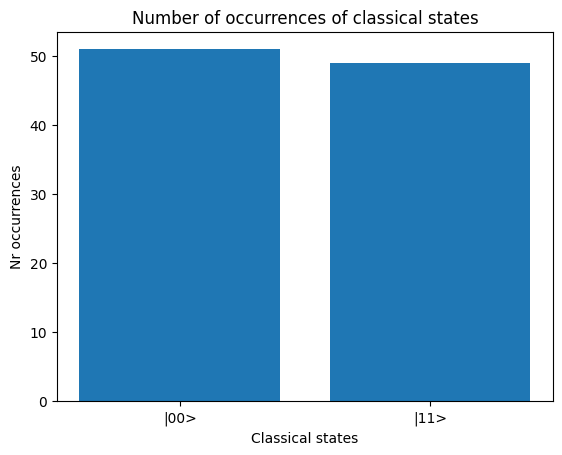

In [17]:
histogram_of_classical_states(result)

## A function to run a circuit
Below, we define a function to run a circuit a number of times and return an array of strings with the classical states.

In [18]:
"""
Function to run a quantum circuit and measure the classical state.
"""
def run_circuit(circuit:Circuit, nr_runs=1000):
    result = []
    for i in range(nr_runs):
        circuit.execute()
        circuit.measure()
        result.append(circuit.get_classical_state_as_string())
    return result

### Example
Next, we create a circuit of $3$ qubits with one Hadamard gate and two CNOT operations. We run this circuit $1000$ times using the function *run_circuit()*.
A histogram showing the occurrences of classical states is then created using the function *histogram_of_classical_states()*.

In [19]:
c = Circuit(3)
c.hadamard(0)
c.cnot(0,1)
c.cnot(1,2)
result = run_circuit(c)

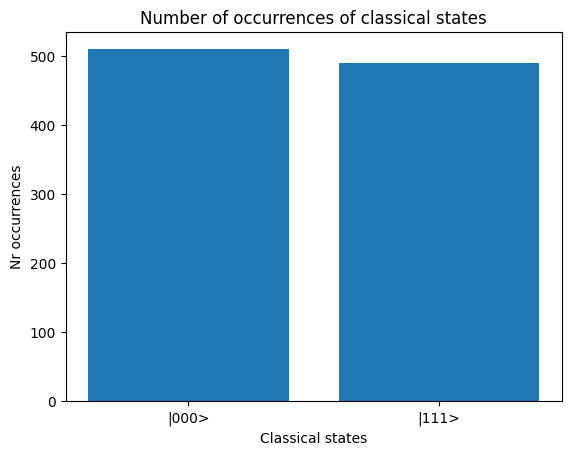

In [20]:
histogram_of_classical_states(result)

All classes and functions introduced in this notebook are also defined in Python program *quantumsim.py*. Subsequent notebooks will rely on this code. We therefore recommmend to download this file to your own computer and study its contents. 
Here is a direct link:

https://github.com/nicokuijpers/QuantumSim/blob/main/quantumsim.py